In [1]:
using Plots
using LinearAlgebra
using NLsolve
using Statistics
using NPZ
using LaTeXStrings
using PyPlot

In [2]:
include("../src/photon_raytrace.jl")

period_average (generic function with 1 method)

In [12]:
Mass_a = 1e-5;
θm = 0.2;
# θm = 0.01;
ωPul = 1.0;
B0 = 1e14;
rNS = 10;
t_in = 0.3306939635357677;
#NS_vel = [0 0 200.0] ./ 2.998e5;
NS_vel = 200 ./ 2.998e5;
NS_theta = 0.0
ln_tend = 20
threshold = 1.0
phiVs=30
thetaVs=30
sve=false;
#xx, vv = test_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; indx=3000, nsteps=1000, ln_tstart=-10, ln_tend=20, ode_err=1e-4)
if sve
    surface_solver(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; nsteps=10, ln_tstart=-15, ln_tend=ln_tend, ode_err=1e-5, phiVs=phiVs, thetaVs=thetaVs, threshold=threshold, sve=sve);
else
#     fileTail = "cPhaseSpace_Map_AxionM_1.0e-6_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_Time_0.3306939635357677_sec_NS_velZ_0.0007_.npz";
#     fileName = "temp_storage/FinalX_"*fileTail;
#     finalX = npzread(fileName);
#     fileName = "temp_storage/FinalV_"*fileTail;
#     finalV = npzread(fileName);
#     fileName = "temp_storage/SurfaceX_"*fileTail;
#     SurfaceX = npzread(fileName);
#     fileName = "temp_storage/SurfaceV_"*fileTail;
#     SurfaceV = npzread(fileName);
#     fileName = "temp_storage/dkdz_"*fileTail;
#     dkdl = npzread(fileName);
#     fileName = "temp_storage/ctheta_"*fileTail;
#     ctheta = npzread(fileName);

    SurfaceX, SurfaceV, finalX, finalV, dkdl, ctheta =  surface_solver(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel, NS_theta; nsteps=10, ln_tstart=-15, ln_tend=ln_tend, ode_err=1e-10, phiVs=phiVs, thetaVs=thetaVs, threshold=threshold, sve=sve);
#     print(length(ctheta))
end

([0.49329041222957276 0.009867123896195392 24.666164989590037; 0.49329041222957276 0.009867123896195392 24.666164989590037; … ; 0.4780517102843952 -0.114599586471883 -24.576516286005536; 0.49140229753619363 -0.009829356566549478 -24.571752960911546], [0.3458765387018294 0.006918453259071011 -0.0027924611676565896; -0.34586320003128435 -0.006918186450084632 0.004126550565031483; … ; -0.003363841194131796 0.0008063872621128293 0.34657013670920434; -0.0034587895985224077 6.918501688536612e-5 0.3466037269012044], [-3152.41624580439 -63.05673607190648 -9.706364109478795e10; 4204.563964082954 84.10249264636899 -9.706391460666927e10; … ; 133.36524888171888 -31.970605144434394 -9.70663775856235e10; 137.12119896051775 -2.7427897036422215 -9.70663780580249e10], [-6.624308151171979e-11 -1.325038283576993e-12 0.0006671170336711654; 5.90148276712351e-11 1.1804539556067057e-12 0.0006671189150536621; … ; -6.14609407945896e-14 1.4733550599982584e-14 0.0006671358567646103; -6.330847971702742e-14 1.2663

In [4]:
SurfaceX

1398×3 Array{Float64,2}:
  0.49329     0.00986712   24.6662
  0.49329     0.00986712   24.6662
  0.479837    0.115028     24.6683
  0.479837    0.115028     24.6683
  0.444186    0.214876     24.6682
  0.444186    0.214876     24.6682
  0.387992    0.304774     24.6658
  0.387992    0.304774     24.6658
  0.313871    0.380552     24.6612
  0.313871    0.380552     24.6612
  0.225271    0.438701     24.6547
  0.225271    0.438701     24.6547
  0.126312    0.476539     24.6465
  ⋮                       
 -0.359803   -0.337543    -24.6642
 -0.279329   -0.406524    -24.6588
 -0.185983   -0.456677    -24.6515
 -0.0841034  -0.485692    -24.6427
  0.0215845  -0.49225     -24.6328
  0.126188   -0.476072    -24.6223
  0.224877   -0.437935    -24.6116
  0.313107   -0.379626    -24.6012
  0.386825   -0.303857    -24.5916
  0.442656   -0.214136    -24.5832
  0.478052   -0.1146      -24.5765
  0.491402   -0.00982936  -24.5718

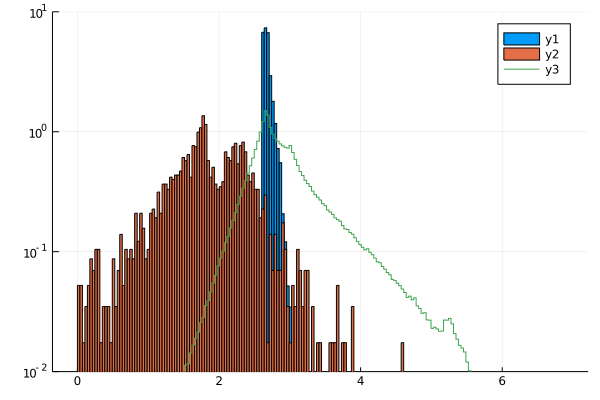

In [10]:
rr = sqrt.(sum(SurfaceX.^2, dims=2))
vv = sqrt.(sum(SurfaceV.^2, dims=2))
dkdlBen = 3 .* 1e-6 ./ (2 .* rr .* vv .* 2.998e5) ./ 6.58e-16
nbins=LinRange(0, 7, 200)
fileNLAST ="../src/results/Trajectories_MassAx_1.0e-6_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_10.0_MassNS_1.0_DispersionEq_wNR_Ax_trajs_1000000_MaxR_1.0_cutT_100_batchS_10_N_Times_1000__fixed_time_0.0_odeErr_1.0e-8_.npz"
oldF=npzread(fileNLAST);
dkdlOld = (oldF[:, 8].^2 ./ 3.14).^(-1);
rr2 = sqrt.(sum(oldF[:, 9:11].^2, dims=2))
vv2 = sqrt.(2 * 132698000000.0 .* 1.0 ./ rr2) ./ 2.998e5 ;
dkdlBen2 = 3 .* 1e-6 ./ (2 .* rr2 .* vv2 .* 2.998e5) ./ 6.58e-16

histogram(ylims = (1e-2,10),)
histogram!(log10.(dkdlBen[:,1]), nbins=nbins, normed=true, yaxis = (:log10))
histogram!(log10.(dkdl[:,1]), bins=nbins, legend=true, normed=true,  yaxis = (:log10))
histogram!(log10.(dkdlOld), bins=nbins, legend=true, normed=true, yaxis = (:log10))
#histogram!(log10.(dkdlBen2), nbins=nbins, normed=true, yaxis = (:log10))

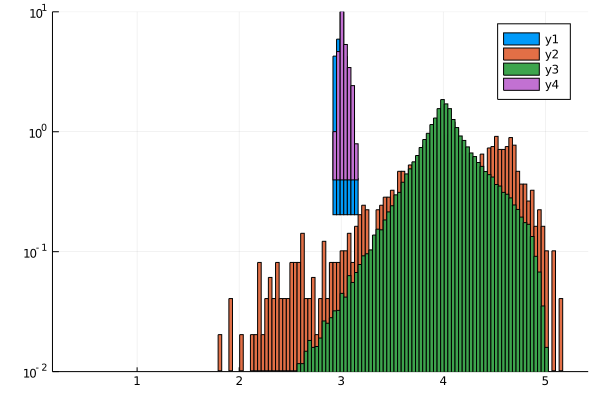

In [13]:
rr = sqrt.(sum(SurfaceX.^2, dims=2))
vv = sqrt.(sum(SurfaceV.^2, dims=2))
dkdlBen = 3 .* 1e-6 ./ (2 .* rr .* vv .* 2.998e5) ./ 6.58e-16
nbins=LinRange(0, 7, 200)
fileNLAST ="../src/results/Trajectories_MassAx_1.0e-5_AxionG_1.0e-12_ThetaM_0.2_rotPulsar_1.0_B0_1.0e14_rNS_10.0_MassNS_1.0_DispersionEq_wNR_Ax_trajs_100000_MaxR_1.0_cutT_100_batchS_10_N_Times_1000__fixed_time_0.0_odeErr_1.0e-8_.npz"
oldF=npzread(fileNLAST);
dkdlOld = (oldF[:, 8].^2 ./ 3.14).^(-1);
rr2 = sqrt.(sum(oldF[:, 9:11].^2, dims=2))
vv2 = sqrt.(2 * 132698000000.0 .* 1.0 ./ rr2) ./ 2.998e5 ;
dkdlBen2 = 3 .* 1e-6 ./ (2 .* rr2 .* vv2 .* 2.998e5) ./ 6.58e-16

histogram(ylims = (1e-2,10),)
histogram!(log10.(dkdlBen[:,1]), nbins=nbins, normed=true, yaxis = (:log10))
histogram!(log10.(dkdl[:,1]), bins=nbins, legend=true, normed=true,  yaxis = (:log10))
histogram!(log10.(dkdlOld), bins=nbins, legend=true, normed=true, yaxis = (:log10))
histogram!(log10.(dkdlBen2), nbins=nbins, normed=true, yaxis = (:log10))

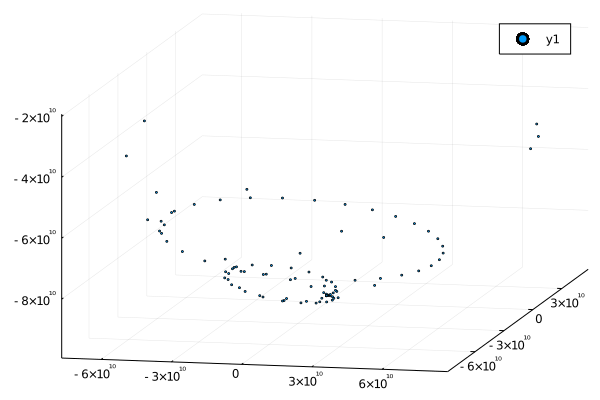

In [12]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)

# #surface!(finalX[finalX[:,3].>0,1], finalX[finalX[:,3].>0,2], finalX[finalX[:,3].>0,3], zlims=(-maxVZ,maxVZ))
# #surface!(camera=(20,20))

# n=40
# phi = 0:pi/50:2*pi;
# theta = 0:pi/100:pi;
# radi = 1e-4 # pc

# x = radi .* 3.086e+13 .* [cos(t)*sin(p) for t in theta, p in phi];
# y =  radi .* 3.086e+13 .*  [sin(t)*sin(p) for t in theta, p in phi] .+ 7e10;
# z =  radi .* 3.086e+13 .* [cos(p) for t in theta, p in phi] .- 9e10;

# plot!(x,y,z, legend=false, color=:blue)
limS = 5*stdZ
dist = limS
surface()
#scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=1, markeralpha=1, zlims=(medianZ-dist*2,medianZ+dist*2), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=2, markeralpha=1)
surface!(camera=(20,40))


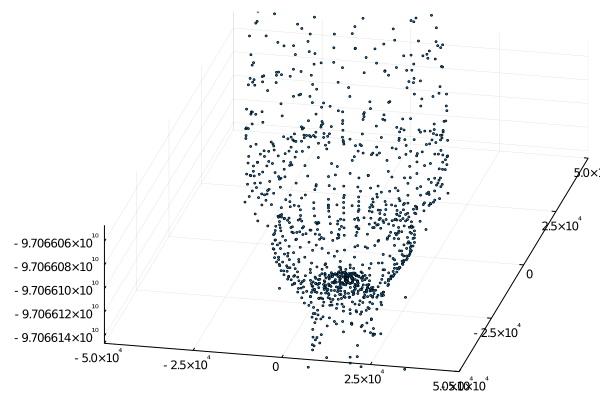

In [16]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)

# #surface!(finalX[finalX[:,3].>0,1], finalX[finalX[:,3].>0,2], finalX[finalX[:,3].>0,3], zlims=(-maxVZ,maxVZ))
# #surface!(camera=(20,20))

# n=40
# phi = 0:pi/50:2*pi;
# theta = 0:pi/100:pi;
# radi = 1e-4 # pc

# x = radi .* 3.086e+13 .* [cos(t)*sin(p) for t in theta, p in phi];
# y =  radi .* 3.086e+13 .*  [sin(t)*sin(p) for t in theta, p in phi] .+ 7e10;
# z =  radi .* 3.086e+13 .* [cos(p) for t in theta, p in phi] .- 9e10;

# plot!(x,y,z, legend=false, color=:blue)
limS = 3*stdZ
dist = 5e4
surface()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=1.3, zlims=(medianZ-dist,medianZ+dist), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,70))


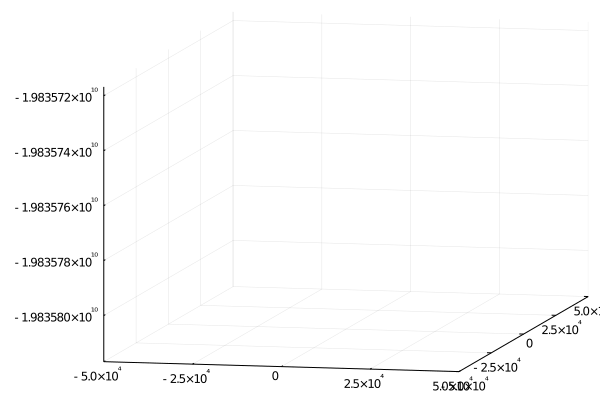

In [100]:
gr(format="png")
maxVZ = minimum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])

medianZ = Statistics.median(finalX[:, 3])
stdZ = Statistics.std(finalX[:, 3])

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh = 1.3e4
thresh2 = 1.7e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];

limS = 5*stdZ
dist = 5e4
surface()
scatter!(highlightx, highlighty, highlightz, markersize=1.3, zlims=(medianZ-dist,medianZ+dist), xlims=(-dist, dist),ylims=(-dist, dist), legend=false)
surface!(camera=(20,30))


In [78]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))
scatter()
scatter!(finalX[:,1], finalX[:,2], finalX[:,3], markersize=2, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

UndefVarError: UndefVarError: scatter not defined

In [33]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh = 1e4
thresh2 = 2e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightx2 = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];
highlighty2 = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];
highlightz2 = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].<thresh)&&(rho[i].<thresh2)];

scatter()
scatter!(highlightx, highlighty,highlightz, markersize=1.5, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(highlightx2, highlighty2,highlightz2, markersize=1, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

UndefVarError: UndefVarError: scatter not defined

In [67]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(abs.(finalX[:,2]))
maxVX = maximum(abs.(finalX[:,1]))

rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
thresh0 = 1e4
thresh = 2e4
thresh2 = 5e4
highlightx = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightx2 = [finalX[i, 1] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];
highlighty2 = [finalX[i, 2] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];
highlightz2 = [finalX[i, 3] for i in 1:length(finalX[:,1]) if (rho[i].>thresh0)&&(rho[i].<thresh)];

scatter()
scatter!(highlightx, highlighty,highlightz, markersize=1.5, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(highlightx2, highlighty2,highlightz2, markersize=1, zlims=(-maxVZ, 10), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
scatter!(camera=(0,90))
#scatter!(camera=(0,90))
#surface(finalX[:,1], finalX[:,2], finalX[:,3])

UndefVarError: UndefVarError: scatter not defined

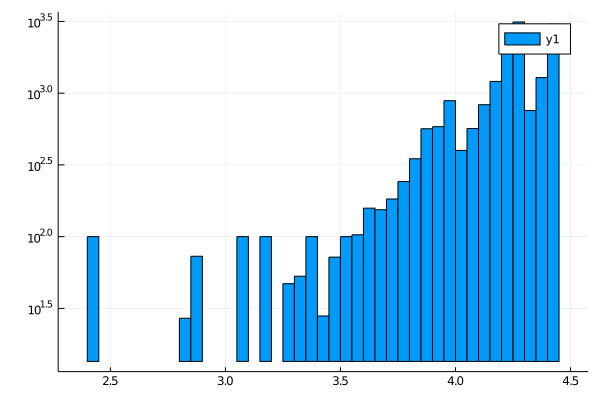

In [273]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
histogram(log10.(rho), yaxis = (:log10))

In [274]:
θ = LinRange(-0.003, π+0.003, 100)
ϕ = LinRange(0.0 , 2*π , 100)
Csurf = zeros(length(θ))
x0CS_f2 = zeros(length(θ) * length(ϕ), 3)
rL = 10 .^ LinRange(log10.(10), 3, 5000)
MagnetoVars = [θm, ωPul, B0, rNS, t_in] # θm, ωPul, B0, rNS, gamma factors
cnt = 1
for i in 1:length(θ)
    for j in 1:length(ϕ)
        x0CS = [rL .* sin.(θ[i]) .* cos.(ϕ[j]) rL .* sin.(θ[i]) .* sin.(ϕ[j]) rL .* cos.(θ[i])];
        ωpL = RayTracer.GJ_Model_ωp_vec(x0CS, t_in, MagnetoVars[1], MagnetoVars[2], MagnetoVars[3], MagnetoVars[4])
        cx_list = RayTracer.get_crossings(log10.(ωpL) .- log10.(1e-6))
        cross = RayTracer.apply(cx_list, rL)
        if length(cx_list.i1) != 0
            Csurf[i] = cross[1]
        else
            Csurf[i] = 0.0
        end
        x0CS_f2[cnt,:] =[Csurf[i] .* sin.(θ[i]) .* cos.(ϕ[j]) Csurf[i] .* sin.(θ[i]) .* sin.(ϕ[j]) Csurf[i] .* cos.(θ[i])];
        cnt += 1
    end
end

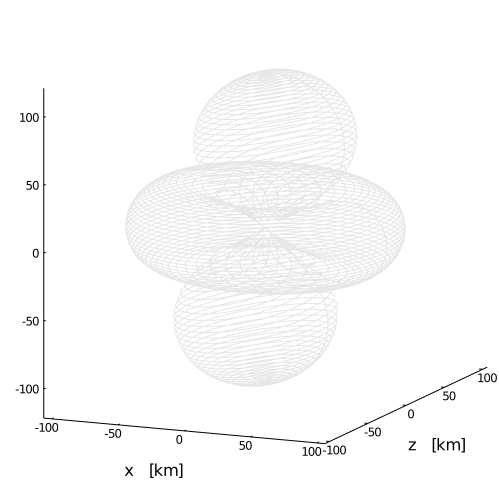

In [275]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100
highlight = SurfaceX[rho[:] .> 1e8, :];
scatter(highlight[:,1], highlight[:,2], highlight[:,3], markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

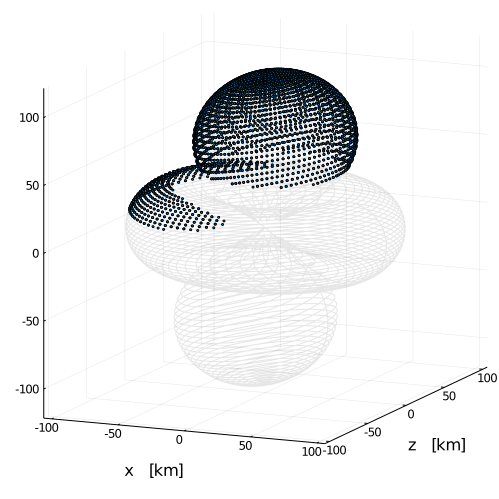

In [276]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.89e4
thresh2 = 5e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=true, xlims=[-scale,scale], ylim=[-scale,scale])

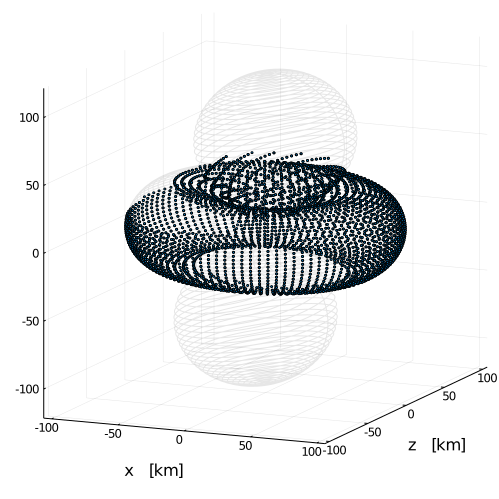

In [227]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.e4
thresh2 = 1.88e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=true, xlims=[-scale,scale], ylim=[-scale,scale])

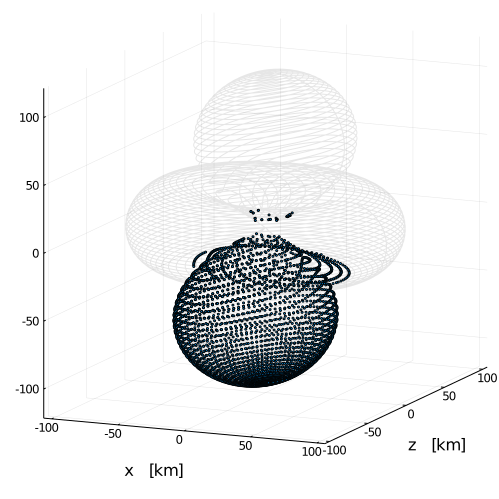

In [228]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1
thresh2 = 1e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=true, xlims=[-scale,scale], ylim=[-scale,scale])

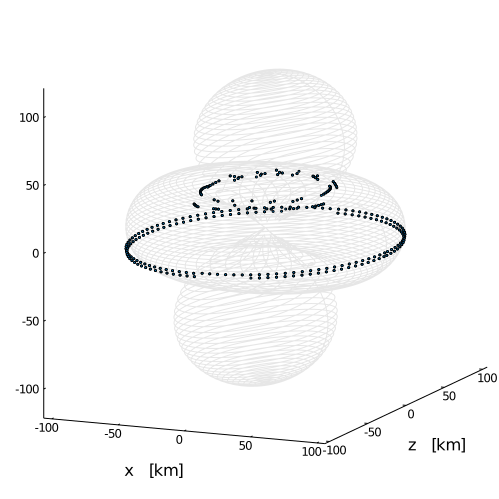

In [207]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1.6e4
thresh2 = 1.65e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()
scatter(highlightx, highlighty, highlightz, markersize=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

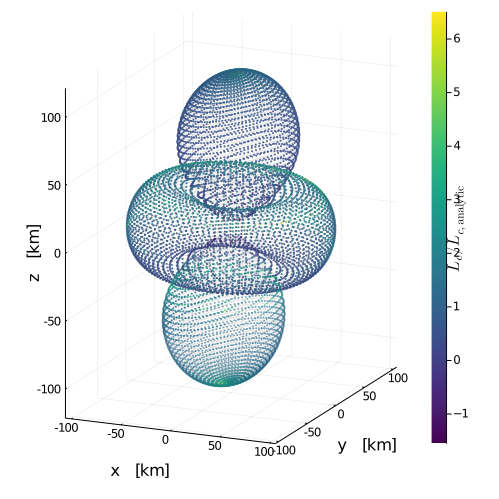

In [280]:
rho = sqrt.(sum(finalX[:,1:2].^2, dims=2));
#histogram(rho, yaxis = (:log10))
scale=100

thresh = 1
thresh2 = 1e4
highlightx = [SurfaceX[i, 1] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlighty = [SurfaceX[i, 2] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
highlightz = [SurfaceX[i, 3] for i in 1:length(SurfaceX[:,1]) if (rho[i].>thresh)&&(rho[i].<thresh2)];
plot()

rr = sqrt.(sum(SurfaceX.^2, dims=2))
vv = sqrt.(sum(SurfaceV.^2, dims=2))
dkdlBen = 3 .* 1e-6 ./ (2 .* rr .* vv .* 2.998e5) ./ 6.58e-16
colorS = log10.((dkdl .* ctheta ./ dkdlBen) .^(-1))
scatter(SurfaceX[:, 1], SurfaceX[:, 2], SurfaceX[:,3], markersize=2, markeralpha=0.6,markerstrokewidth=0, markerstrokealpha = 0.0, mc=:viridis, mz=colorS, colorbar_title=L"L_c / L_{c, \textrm{analytic}}")
plot!(x0CS_f2[:, 1], x0CS_f2[:, 2], x0CS_f2[:, 3], lw=1, c=:black,  fill=:true, alpha=0.1, legend=false,ylabel="y   [km]", zlabel="z   [km]", xlabel="x   [km]")
#plot!(-x0CS_f2[:, 1], x0CS_f2[:, 2],x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=true, xlims=[-scale,scale], ylim=[-scale,scale])



In [856]:
xx, vv = test_runner(Mass_a, θm, ωPul, B0, rNS, t_in, NS_vel; indx=2345, nsteps=1000, ln_tstart=-10, ln_tend=20, ode_err=1e-4);

In [886]:
θ = LinRange(-0.003, π+0.003, 100)
ϕ = π
Csurf = zeros(length(θ))
x0CS_f2 = zeros(length(θ), 3)
rL = 10 .^ LinRange(log10.(10), 4, 10000)
MagnetoVars = [θm, ωPul, B0, rNS, t_in] # θm, ωPul, B0, rNS, gamma factors
for i in 1:length(θ)
    x0CS = [rL .* sin.(θ[i]) .* cos.(ϕ) rL .* sin.(θ[i]) .* sin.(ϕ) rL .* cos.(θ[i])];
    ωpL = RayTracer.GJ_Model_ωp_vec(x0CS, t_in, MagnetoVars[1], MagnetoVars[2], MagnetoVars[3], MagnetoVars[4])
    cx_list = RayTracer.get_crossings(log10.(ωpL) .- log10.(1e-6))
    cross = RayTracer.apply(cx_list, rL)
    if length(cx_list.i1) != 0
        Csurf[i] = cross[1]
    else
        Csurf[i] = 10.0
    end
    x0CS_f2[i,:] =[Csurf[i] .* sin.(θ[i]) .* cos.(ϕ) Csurf[i] .* sin.(θ[i]) .* sin.(ϕ) Csurf[i] .* cos.(θ[i])];
end

#plot!(x0CS_f[:, 1], x0CS_f[:, 3], lw=2, c=:black, xlims=[-200,200],ylims=[-200, 200], fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="ρ   [km]")
#plot!(x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black, xlims=[-200,200],ylims=[-200, 200], fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")

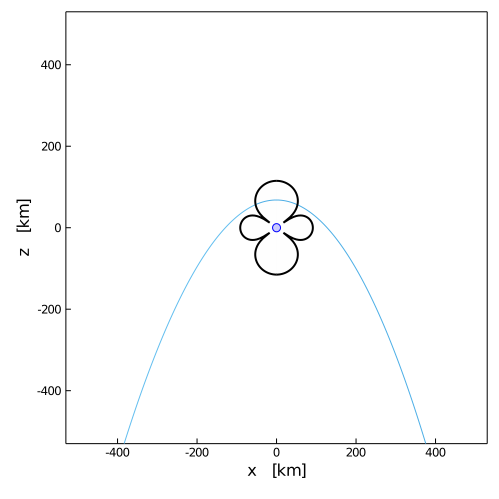

In [858]:
function circleShape(h, k, r)
    th = LinRange(0, 2*π, 500)
    h .+ r*sin.(th), k .+ r*cos.(th)
end

plot(framestyle=:box, palette=:default)
plot!(xx[1,1,:], xx[1,3,:],legend=false, palette=:cmyk)
plot!(xx[2,1,:], xx[2,3,:],legend=false, palette=:cmyk)
plot!(circleShape(0, 0, 10), seriestype=[:shape, ], lw = 1, c =:blue, linecolor=:blue,legend=false,fillalpha=0.2 )
scale = 500
#scale = 100000
#plot!([0], seriestype="vline", c =:black, lw=2)
plot!(x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(-x0CS_f2[:, 1], x0CS_f2[:, 3], lw=2, c=:black,  fill=:true, fillalpha=0.005, legend=false,ylabel="z   [km]", xlabel="x   [km]")
plot!(size=(500,500), grid=false, xlims=[-scale,scale], ylim=[-scale,scale])

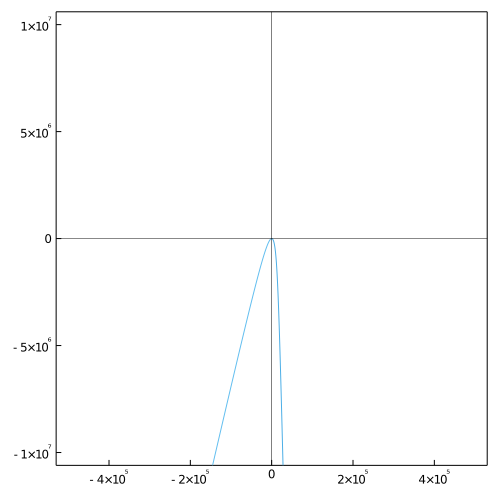

In [859]:
plot(framestyle=:box, palette=:default)
plot!(xx[1,1,:], xx[1,3,:],legend=false, palette=:cmyk)
plot!(xx[2,1,:], xx[2,3,:],legend=false, palette=:cmyk)
plot!(circleShape(0, 0, 10), seriestype=[:shape, ], lw = 5, c =:blue, linecolor=:blue,legend=false,fillalpha=0.2 )
scale = 1e7

plot!([0], seriestype="vline", c =:black, lw=.5)
plot!([0], seriestype="hline", c =:black, lw=.5)
plot!(size=(500,500), grid=false, xlims=[-5e5,5e5], ylim=[-scale,scale])

In [860]:
vv[2,:,end] * 2.998e5

3-element Array{Float64,1}:
   2.4124090031812377
  -0.8719788612408637
 200.16842841766558

In [489]:
gr(format="png")
maxVZ = maximum(finalX[:,3])
maxVY = maximum(finalX[:,2])
maxVX = maximum(finalX[:,1])
include("polyharmonic_spline.jl") 

n=20
xgrid = ones(n)*range(-1e11,stop=1e11,length=n)'
ygrid = range(-1e11,stop=1e11,length=n)*ones(n)'

zgrid = S2.(xgrid,ygrid)
S2 = PolyharmonicSpline(2,[x y],z)
plot_surface(xgrid,ygrid,zgrid,alpha=0.5)
#scatter(finalX[:,1], finalX[:,2], finalX[:,3], markersize=4, camera=(40,50),zlims=(-maxVZ,maxVZ), xlims=(-maxVX,maxVX), ylims=(-maxVY,maxVY), legend=false)
#surface(finalX[finalX[:,3].<0,1], finalX[finalX[:,3].<0,2], finalX[finalX[:,3].<0,3])
#scatter3D(x,y,z,color="r")
show()

ErrorException: could not open file /Users/samuelwitte/Desktop/Magnetized_Plasma/Axion_Infall/notebooks/polyharmonic_spline.jl

In [187]:
xx[1,:,end]

3-element Array{Float64,1}:
 -20244.086893021595
     -1.7303344174464013
     -1.7981236460685256e9

In [189]:
sqrt.(sum(xx[2,:,:].^2, dims=1))

1×100 Array{Float64,2}:
 44.3601  44.9198  45.6933  46.7669  …  5.29933e10  7.17406e10  9.71233e10

In [190]:
sqrt.(sum(xx[1,:,:].^2, dims=1))

1×100 Array{Float64,2}:
 44.3601  43.8108  43.085  42.1377  …  5.29933e10  7.17406e10  9.71232e10

In [191]:
sqrt.(sum(vv[2,:,:].^2, dims=1)) .* 2.998e5

1×100 Array{Float64,2}:
 77348.6  76865.2  76211.9  75332.0  …  200.135  200.13  200.127  200.125

In [192]:
sqrt.(sum(vv[1,:,:].^2, dims=1)) .* 2.998e5

1×100 Array{Float64,2}:
 77348.6  77831.9  78484.8  79362.1  …  200.135  200.13  200.127  200.124

In [222]:
LinRange(0.05 , π - 0.01, 3)

3-element LinRange{Float64}:
 0.05,1.5908,3.13159